In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid', font='Microsoft JhengHei')

In [13]:
data = pd.read_csv("./data.csv", encoding="mbcs", skiprows=1)
# It is based on "綜合所得總額" or "各類所得金額合計" to define where the poorest town in each county is and where the richest town in each county is.
# According to the result of p1, we can know that the common keyword of sources of income is "各類"
# Hence, we can use filter to select the specific columns 
# to figure out what the main categories of sources of income are for the people in each poorest town and each richest town.
location_columns = ["縣市名稱", "鄉鎮市區名稱", "村里名稱"]
selected_columns = location_columns.copy()
selected_columns.extend(list(data.filter(regex='綜合所得總額')))
selected_columns.extend(list(data.filter(regex='各類')))
selected_columns.remove("綜合所得稅各類所得納稅單位")
selected_columns.remove('各類所得金額申報大於歸戶')
selected_columns

['縣市名稱',
 '鄉鎮市區名稱',
 '村里名稱',
 '綜合所得總額',
 '各類所得金額合計',
 '各類所得金額營利所得',
 '各類所得金額執行業務所得',
 '各類所得金額薪資所得',
 '各類所得金額利息所得',
 '各類所得金額租賃及權利金',
 '各類所得金額財產交易所得',
 '各類所得金額機會中獎所得',
 '各類所得金額股利所得',
 '各類所得金額退職所得',
 '各類所得金額其他所得',
 '各類所得金額稿費所得']

In [14]:
data = data[selected_columns]
### About analysis
# I think it is more precise by using median to evaluate the income level in a location. 
# By using average number of income, the result will be affected seriously by the extreme cases.
# However, I don't know the actual method was taken to process the raw data I got.
richest_data_set = data.loc[data.groupby(location_columns[0])["各類所得金額合計"].idxmax()]
poorest_data_set = data.loc[data.groupby(location_columns[0])["各類所得金額合計"].idxmin()]
# From these two data set, you can know where the poorest counties are and where the richest counties are.

In [15]:
# both wide_to_long and melt can do this 
id_vars= ["縣市名稱", "鄉鎮市區名稱", "村里名稱", "綜合所得總額", "各類所得金額合計"]
long_poorest_data_set = poorest_data_set.melt(
    id_vars= id_vars,
    var_name= "categories",
    value_name= "income",
)
long_poorest_data_set.loc[long_poorest_data_set.groupby(id_vars)["income"].idxmax()]
# As u can see in this table, salary is the common main source for the poorest areas.

,縣市名稱,鄉鎮市區名稱,村里名稱,綜合所得總額,各類所得金額合計,categories,income
44,南投縣,仁愛鄉,榮興村,3183.0,3183.0,各類所得金額薪資所得,1667.0
45,嘉義市,西區,香湖里,143348.0,143348.0,各類所得金額薪資所得,121693.0
46,嘉義縣,阿里山鄉,茶山村,10932.0,10932.0,各類所得金額薪資所得,10533.0
47,基隆市,七堵區,瑪東里,55062.0,55062.0,各類所得金額薪資所得,48057.0
48,宜蘭縣,大同鄉,太平村,4837.0,4837.0,各類所得金額薪資所得,4339.0
49,屏東縣,春日鄉,士文村,23463.0,23463.0,各類所得金額薪資所得,23041.0
50,彰化縣,芳苑鄉,芳中村,30267.0,30267.0,各類所得金額薪資所得,25973.0
51,新北市,平溪區,新寮里,14941.0,14941.0,各類所得金額薪資所得,13254.0
52,新竹市,北區,中央里,109146.0,109146.0,各類所得金額薪資所得,80195.0
53,新竹縣,橫山鄉,豐鄉村,36800.0,36800.0,各類所得金額薪資所得,27433.0


In [16]:
id_vars= ["縣市名稱", "鄉鎮市區名稱", "村里名稱", "綜合所得總額", "各類所得金額合計"]
long_richest_data_set = richest_data_set.melt(
    id_vars= id_vars,
    var_name= "categories",
    value_name= "income",
)
long_richest_data_set.loc[long_richest_data_set.groupby(id_vars)["income"].idxmax()]
# As u can see in this table, salary is also the common main source for the richest areas.
# In addition, in some areas, the people there earn money from stocks.

,縣市名稱,鄉鎮市區名稱,村里名稱,綜合所得總額,各類所得金額合計,categories,income
44,南投縣,南投市,營北里,2321529.0,2322138.0,各類所得金額薪資所得,1767549.0
45,嘉義市,西區,劉厝里,2015160.0,2015484.0,各類所得金額薪資所得,1615134.0
46,嘉義縣,民雄鄉,福樂村,1617595.0,1618391.0,各類所得金額薪資所得,1374784.0
47,基隆市,信義區,孝忠里,2459756.0,2460349.0,各類所得金額薪資所得,2135266.0
48,宜蘭縣,宜蘭市,思源里,1660527.0,1660585.0,各類所得金額薪資所得,1362886.0
49,屏東縣,屏東市,崇蘭里,3554167.0,3554203.0,各類所得金額薪資所得,3017441.0
160,彰化縣,大村鄉,美港村,794528.0,3303044.0,各類所得金額股利所得,2594656.0
51,新北市,林口區,南勢里,10560988.0,10780282.0,各類所得金額薪資所得,8447491.0
52,新竹市,東區,龍山里,8956854.0,9065665.0,各類所得金額薪資所得,7972199.0
53,新竹縣,竹北市,東平里,12909212.0,13098272.0,各類所得金額薪資所得,11232006.0


In [17]:
def pie(v, l, color=None):
    plt.pie(v, labels=l.values)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


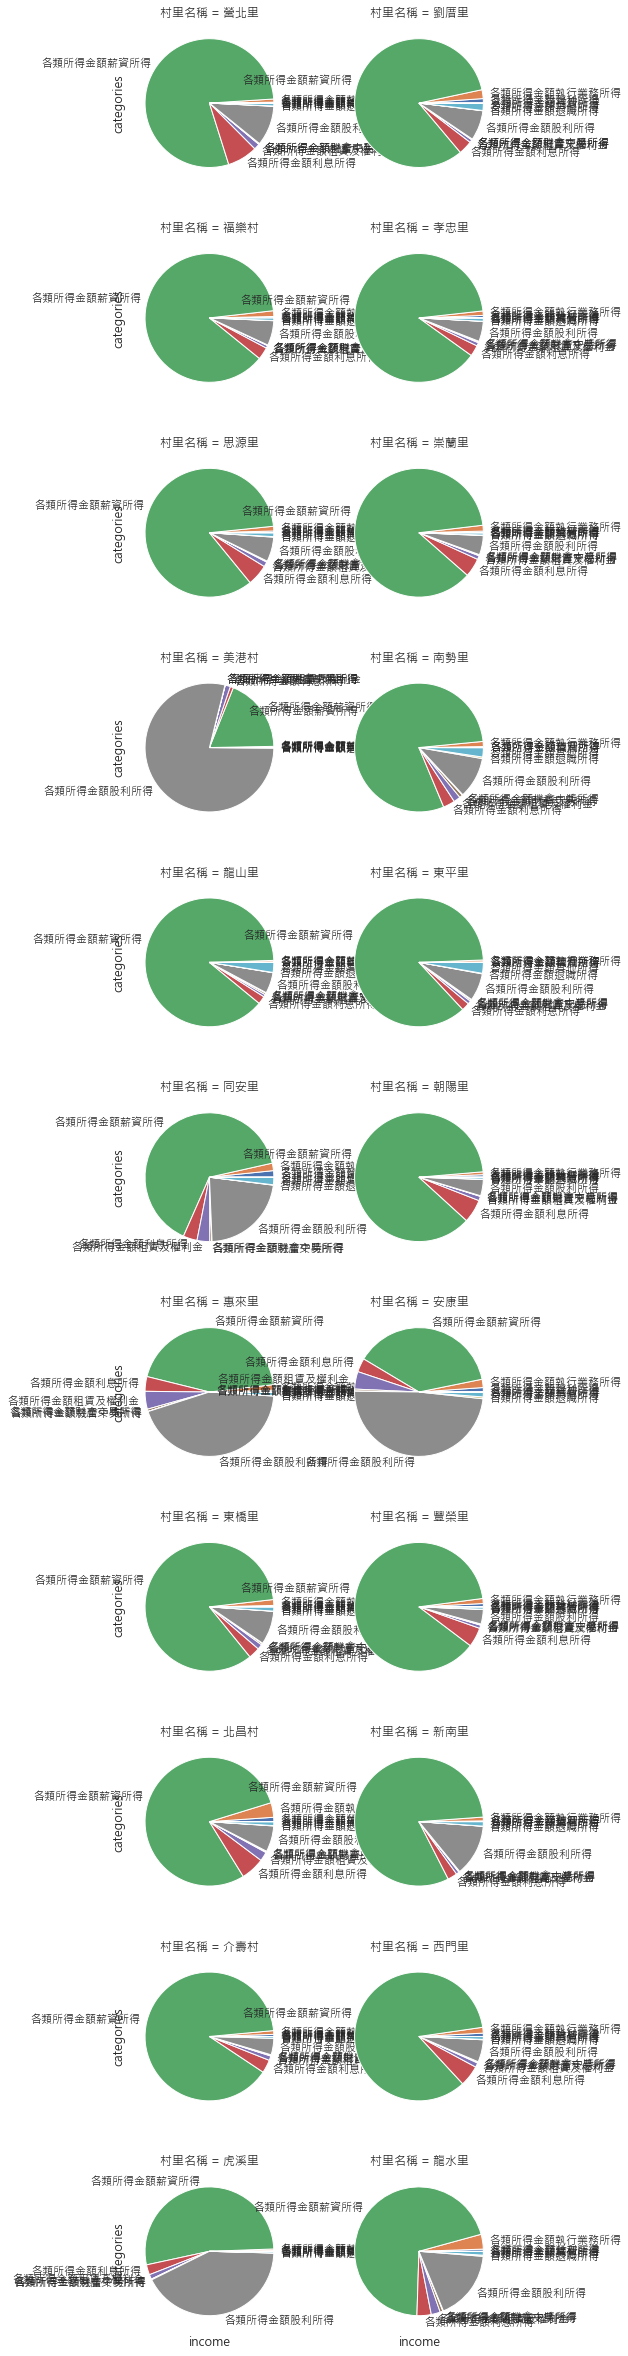

In [18]:
g = sns.FacetGrid(long_richest_data_set, col="村里名稱", col_wrap=2)
g.map(pie, "income", "categories")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


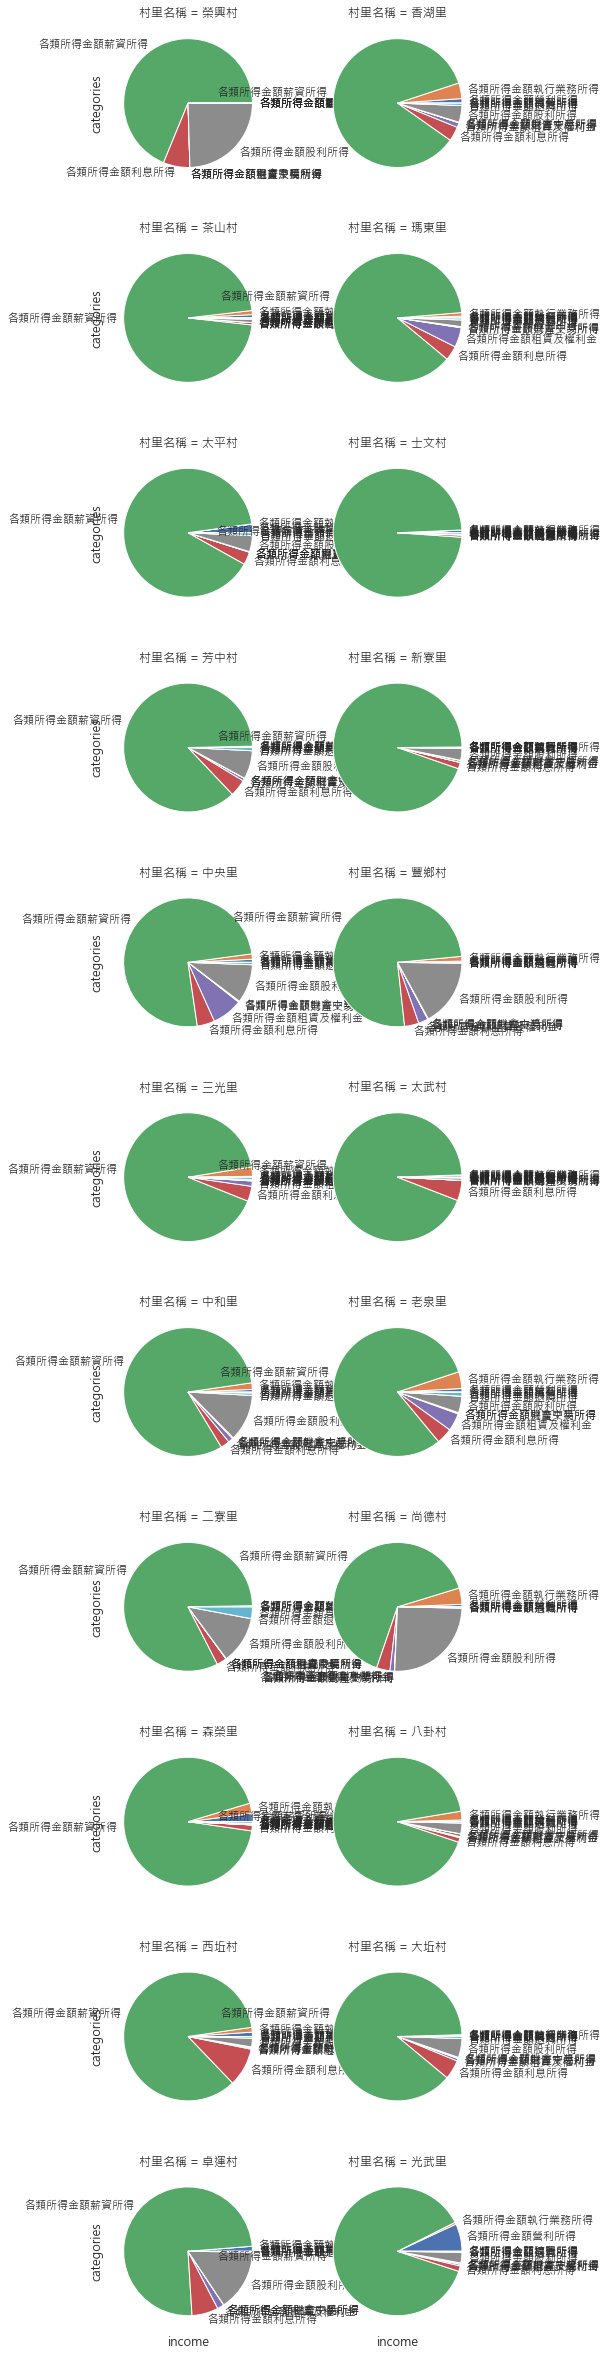

In [19]:
g = sns.FacetGrid(long_poorest_data_set, col="村里名稱", col_wrap=2)
g.map(pie, "income", "categories")

In [20]:
# Further discussion: 
# If I could get the geo data of each county, I would project piecharts on a map to visualize the data.